In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import PyQt5

In [2]:
pmra_outliers= pd.read_csv('pmra_outliers.csv')

In [3]:
pmra_outliers.head()

,Unnamed: 0,source_id,ra,dec,l,b,parallax,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,dr2_radial_velocity,dr2_radial_velocity_error,r_med_geo,r_lo_geo,r_hi_geo,cube_id,pmra_deviation,pmdec_deviation
0,145572,2343051792663454976,9.988743,-28.035375,12.649668,-87.298757,4.889204,315.47690,364.193786,0.014907,-147.380689,0.013941,-46.355637,2.122902,203.731020,203.10910,204.340560,0,-343.797461,127.025179
1,2234418,2318914523136657792,8.259353,-29.074708,6.234956,-85.500016,11.751412,852.61940,-127.881662,0.015425,-69.914325,0.013069,-2.713808,0.216948,84.893135,84.78940,85.005550,0,148.277987,49.558816
2,2235300,2320174597821925504,5.224313,-29.690209,10.261629,-82.814269,12.224113,379.63440,-116.179322,0.033126,-85.228552,0.031795,-6.365917,0.192952,81.603070,81.38137,81.827560,0,136.575647,64.873043
3,2236525,2321900178242305664,5.197157,-28.899680,16.477153,-83.008911,14.723607,113.35716,-124.597912,0.109571,-249.947421,0.117070,37.947906,1.550238,67.946014,67.39255,68.458755,0,144.994237,229.591912
4,2237181,2316954295766878080,4.951248,-30.906005,2.406730,-82.123134,2.956088,194.06468,200.038259,0.015128,-30.805249,0.015542,-23.742700,4.483841,334.139280,332.69025,335.533540,0,-179.641934,10.449740


In [4]:
cubes= pd.read_csv('cubos.csv')

In [5]:
cubes

,Unnamed: 0,r_med,l_med,b_med,pmra_med,pmdec_med,std_pmra,std_pmdec
0,0,187.378088,9.473684,-85.263158,20.396325,-20.355509,45.445484,37.075094
1,1,187.378088,28.421053,-85.263158,28.027875,-24.087528,85.808060,123.094400
2,2,187.378088,47.368421,-85.263158,30.149371,-17.954832,58.382921,44.824317
3,3,187.378088,66.315789,-85.263158,22.858752,-21.608687,53.615574,35.308682
4,4,187.378088,85.263158,-85.263158,29.330315,-20.488036,78.836805,42.225514
...,...,...,...,...,...,...,...,...
6854,6854,991.069513,274.736842,85.263158,NaN,NaN,NaN,NaN
6855,6855,991.069513,293.684211,85.263158,2.716697,-8.621976,8.697161,9.351986
6856,6856,991.069513,312.631579,85.263158,-0.849081,-9.210974,0.000000,0.000000
6857,6857,991.069513,331.578947,85.263158,NaN,NaN,NaN,NaN


In [6]:
cubes.rename(columns={f'{cubes.columns[0]}': 'cube_id'}, inplace=True)

In [7]:
cubes

,cube_id,r_med,l_med,b_med,pmra_med,pmdec_med,std_pmra,std_pmdec
0,0,187.378088,9.473684,-85.263158,20.396325,-20.355509,45.445484,37.075094
1,1,187.378088,28.421053,-85.263158,28.027875,-24.087528,85.808060,123.094400
2,2,187.378088,47.368421,-85.263158,30.149371,-17.954832,58.382921,44.824317
3,3,187.378088,66.315789,-85.263158,22.858752,-21.608687,53.615574,35.308682
4,4,187.378088,85.263158,-85.263158,29.330315,-20.488036,78.836805,42.225514
...,...,...,...,...,...,...,...,...
6854,6854,991.069513,274.736842,85.263158,NaN,NaN,NaN,NaN
6855,6855,991.069513,293.684211,85.263158,2.716697,-8.621976,8.697161,9.351986
6856,6856,991.069513,312.631579,85.263158,-0.849081,-9.210974,0.000000,0.000000
6857,6857,991.069513,331.578947,85.263158,NaN,NaN,NaN,NaN


In [12]:
data=pmra_outliers.merge(cubes, on='cube_id') #merging outliers with their cubes

## Clustering

The idea consists in grouping the outliers based on their position and see if there's a movement correlation among the ones that are near each other on the plane (we're not taking distance into acount since the outliers are in the same cube, they're not so far from each other).

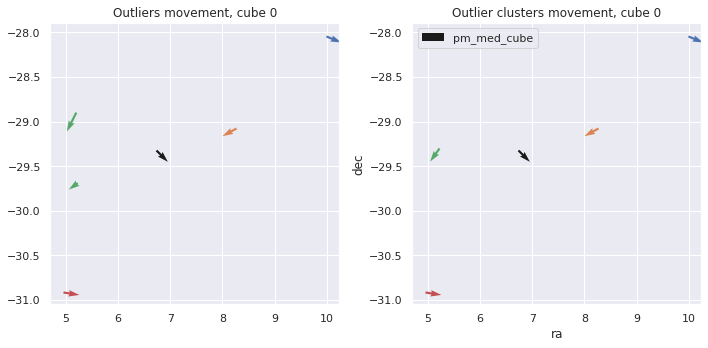

In [11]:
from sklearn.cluster import DBSCAN

#eps: max distance to classified a particle as neighbor
#min_samples: min number of points to consider particle as core

for id in cubes.cube_id[:1]:
    cube= pd.concat([data.query(f'cube_id == {id}')])
    cube.columns

    clusters= DBSCAN(eps=1, min_samples=1).fit(cube.loc[:,['ra', 'dec']])
    cube['label']= clusters.labels_

    plt.figure(figsize=(10,5))
    ax1=plt.subplot(1,2,1)
    ax1.set_title(f'Outliers movement, cube {id}')
    color= sns.color_palette()[:len(cube.label)]
    ax1.quiver(cube.ra.mean(), cube.dec.mean(), cube.pmra_med.unique()[0], cube.pmdec_med.unique()[0], color='k', label='pm_med_cube')
    for i, lab in enumerate(cube.label.unique()):
        cluster= cube.query(f'label=={lab}')
        ax1.quiver(cluster.ra, cluster.dec, cluster.pmra, cluster.pmdec, color=color[i])

    ax2=plt.subplot(1,2,2, sharex=ax1, sharey=ax1)
    ax2.set_title(f'Outlier clusters movement, cube {id}')
    color= sns.color_palette()[:len(cube.label)]
    ax2.quiver(cube.ra.mean(), cube.dec.mean(), cube.pmra_med.unique()[0], cube.pmdec_med.unique()[0], color='k', label='pm_med_cube')
    for i, lab in enumerate(cube.label.unique()):
        cluster= cube.query(f'label=={lab}')
        ax2.quiver(cluster.ra.mean(), cluster.dec.mean(), cluster.pmra.mean(), cluster.pmdec.mean(), color=color[i])

    plt.xlabel('ra')
    plt.ylabel('dec')
    plt.legend()
    plt.tight_layout()
    plt.show()

#Each row represent not a star but a cluster classified by dbscan.

## Trying to see it 3d

In [89]:
from astropy.coordinates import ICRS
from astropy import units as u

In [92]:
data.columns

Index(['Unnamed: 0', 'source_id', 'ra', 'dec', 'l', 'b', 'parallax',
       'parallax_over_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'dr2_radial_velocity', 'dr2_radial_velocity_error', 'r_med_geo',
       'r_lo_geo', 'r_hi_geo', 'cube_id', 'pmra_deviation', 'pmdec_deviation',
       'r_med', 'l_med', 'b_med', 'pmra_med', 'pmdec_med', 'std_pmra',
       'std_pmdec', 'x', 'y', 'z'],
      dtype='object')

In [99]:
data_cartesian= ICRS(distance= data['r_med_geo']*u.pc, dec=data['dec']*u.degree, ra=data['ra']*u.degree, \
                pm_ra_cosdec= data['pmra']*u.mas/u.yr, pm_dec= data['pmdec']*u.mas/u.yr, radial_velocity= data['dr2_radial_velocity']*u.km/u.s)
data['x']= data_cartesian.cartesian.x.value
data['y']= data_cartesian.cartesian.y.value
data['z']= data_cartesian.cartesian.z.value
data['vx']= data_cartesian.velocity.d_x.value
data['vy']= data_cartesian.velocity.d_y.value
data['vz']= data_cartesian.velocity.d_z.value

In [119]:
# clusters= DBSCAN(eps=1, min_samples=1).fit(data.loc[:,['ra', 'dec']])
# data['label']= clusters.labels_

In [138]:
test=data[:1000]

In [131]:
%matplotlib widget

In [140]:
plt.figure()
ax=plt.axes(projection='3d')

color= sns.color_palette()[:len(data.label)]
ax.quiver(test['x'], test['y'], test['z'], test['vx'], test['vy'], test['vz'], length=5, normalize=True)